In [161]:
import pandas as pd
import anndata as ad

## create the adata

In [162]:
# # Load the gene expression matrix and metadata
# gene_expression_matrix = pd.read_csv("/Users/rssantanu/Desktop/codebase/constrained_FM/datasets/raw_datasets/GSE092025/gene_expression_matrix.csv", index_col=0)
# metadata = pd.read_csv("/Users/rssantanu/Desktop/codebase/constrained_FM/datasets/raw_datasets/GSE092025/metadata.csv")

# metadata.set_index('vbc', inplace=True)


# # Transpose the gene expression matrix to have cells as rows
# gene_expression_matrix = gene_expression_matrix.T

# # Ensure the matrix columns match the metadata index
# gene_expression_matrix = gene_expression_matrix.loc[metadata.index]

# # Create AnnData object
# adata = ad.AnnData(X=gene_expression_matrix.values, obs=metadata)

# # Add spatial coordinates to obsm
# adata.obsm['spatial'] = metadata[['x', 'y']].values

# # Save the AnnData object to a file
# adata.write("/Users/rssantanu/Desktop/codebase/constrained_FM/datasets/h5ad_processed_datasets/GSE092025_liver_regeneration_visium.h5ad")

In [163]:
# adata.obs['ident'].unique()

# rough

In [164]:
import h5py

def print_h5_structure(name, obj):
    print(name)

# Open the HDF5 file
file_path = '/Users/rssantanu/Desktop/codebase/constrained_FM/scratch/Visium_24h_m1_raw_feature_bc_matrix.h5'
with h5py.File(file_path, 'r') as h5_file:
    # Print the structure of the 'matrix' group
    h5_file['matrix'].visititems(print_h5_structure)

    # Access specific datasets within the 'matrix' group
    # For example, if there is a dataset named 'data'
    if 'data' in h5_file['matrix']:
        data = h5_file['matrix']['data'][:]
        print("Data shape:", data.shape)
        print("Data:", data)

barcodes
data
features
features/_all_tag_keys
features/feature_type
features/genome
features/id
features/name
indices
indptr
shape
Data shape: (7513208,)
Data: [ 1  1  1 ... 10 11 17]


In [165]:
import scanpy as sc

adata = sc.read_10x_h5('/Users/rssantanu/Desktop/codebase/constrained_FM/scratch/Visium_24h_m1_raw_feature_bc_matrix.h5')




/Users/rssantanu/anaconda3/envs/torch_flow_matching/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/rssantanu/anaconda3/envs/torch_flow_matching/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [166]:
adata

AnnData object with n_obs × n_vars = 4992 × 32285
    var: 'gene_ids', 'feature_types', 'genome'

/Users/rssantanu/anaconda3/envs/torch_flow_matching/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/rssantanu/anaconda3/envs/torch_flow_matching/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'Mouse' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical


Index(['Spot_barcode', 'Mouse', 'Time_point', 'Fibrogenic_spot',
       'visium_coor_x', 'visium_coor_y'],
      dtype='object')
AnnData object with n_obs × n_vars = 3075 × 32285
    obs: 'Spot_barcode', 'Mouse', 'Time_point', 'Fibrogenic_spot', 'visium_coor_x', 'visium_coor_y'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
                                   Spot_barcode     Mouse  Time_point  \
AAACAAGTATCTCCCA_1  t_24h_m1_AAACAAGTATCTCCCA_1  t_24h_m1        24.0   
AAACAATCTACTAGCA_1  t_24h_m1_AAACAATCTACTAGCA_1  t_24h_m1        24.0   
AAACACCAATAACTGC_1  t_24h_m1_AAACACCAATAACTGC_1  t_24h_m1        24.0   
AAACAGTGTTCCTGGG_1  t_24h_m1_AAACAGTGTTCCTGGG_1  t_24h_m1        24.0   
AAACATTTCCCGGATT_1  t_24h_m1_AAACATTTCCCGGATT_1  t_24h_m1        24.0   

                    Fibrogenic_spot  visium_coor_x  visium_coor_y  
AAACAAGTATCTCCCA_1              1.0        21053.0        19811.0  
AAACAATCTACTAGCA_1              0.0        10947.0         5579.0  
AAACACCAATA

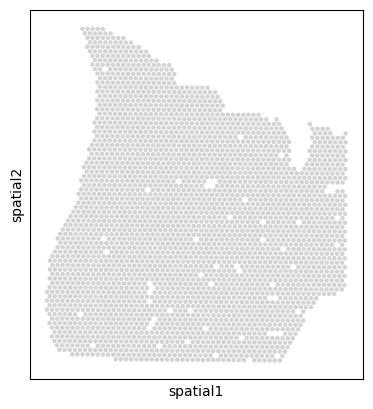

In [167]:
import scanpy as sc
import pandas as pd

# adata = sc.read_10x_h5("/Users/rssantanu/Desktop/codebase/constrained_FM/datasets/raw_datasets/GSE092025/Visium_24h_m1_raw_feature_bc_matrix.h5")
# adata = sc.read_10x_h5("/Users/rssantanu/Desktop/codebase/constrained_FM/datasets/raw_datasets/GSE092025/Visium_24h_m2_raw_feature_bc_matrix.h5")
adata = sc.read_10x_h5("/Users/rssantanu/Desktop/codebase/constrained_FM/datasets/raw_datasets/GSE092025/Visium_48h_m4_raw_feature_bc_matrix.h5")
# adata = sc.read_10x_h5("/Users/rssantanu/Desktop/codebase/constrained_FM/datasets/raw_datasets/GSE092025/Visium_48h_m5_raw_feature_bc_matrix.h5")
# adata = sc.read_10x_h5("/Users/rssantanu/Desktop/codebase/constrained_FM/datasets/raw_datasets/GSE092025/Visium_72h_m1_raw_feature_bc_matrix.h5")
# adata = sc.read_10x_h5("/Users/rssantanu/Desktop/codebase/constrained_FM/datasets/raw_datasets/GSE092025/Visium_72h_m2_raw_feature_bc_matrix.h5")

adata.var_names_make_unique()
meta = pd.read_csv("/Users/rssantanu/Desktop/codebase/constrained_FM/datasets/raw_datasets/GSE092025/Visium_Meta_data.txt", sep=",")
print(meta.columns)
# Clean barcodes: strip prefix and keep suffix "_1"
meta["barcode_clean"] = meta["Spot_barcode"].str.replace("^t_24h_m1_", "", regex=True)
# Standardize adata barcodes 
adata.obs.index = adata.obs.index.str.replace("-1", "_1")
# Set clean barcode as index
meta = meta.set_index("barcode_clean")
# --- Join metadata ---
adata.obs = adata.obs.join(meta, how="left")
# --- Add spatial coordinates ---
adata.obsm["spatial"] = adata.obs[["visium_coor_x", "visium_coor_y"]].to_numpy()
adata = adata[~adata.obs["visium_coor_x"].isna()].copy()
print(adata)
print(adata.obs.head())
print(adata.obsm["spatial"][:5])
sc.pl.spatial(adata, spot_size = 300)

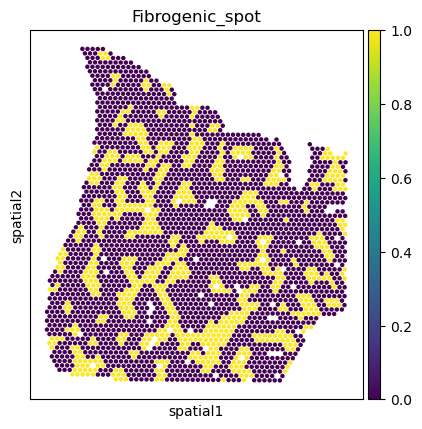

In [168]:
sc.pl.spatial(adata, spot_size = 300, color="Fibrogenic_spot")

In [169]:
import scanpy as sc
import pandas as pd
import numpy as np
import os

def load_visium_data(h5_path, meta_path, sample_id=None, spot_size=300, 
                     barcode_pattern=None, coord_cols=['visium_coor_x', 'visium_coor_y'],
                     sep=",", plot_spatial=True):
    """
    Load and process 10X Visium spatial transcriptomics data with metadata.
    
    Parameters:
    -----------
    h5_path : str
        Path to the .h5 feature-barcode matrix file
    meta_path : str  
        Path to the metadata CSV/TSV file
    sample_id : str, optional
        Sample identifier to clean from barcodes (e.g., 't_24h_m1_')
    spot_size : int, default 300
        Spot size for spatial plotting
    barcode_pattern : str, optional
        Regex pattern to clean barcodes (if sample_id not provided)
    coord_cols : list, default ['visium_coor_x', 'visium_coor_y']
        Column names for spatial coordinates in metadata
    sep : str, default ","
        Separator for metadata file
    plot_spatial : bool, default True
        Whether to generate spatial plot
        
    Returns:
    --------
    adata : AnnData
        Processed AnnData object with spatial coordinates and metadata
    """
    
    # Load 10X data
    adata = sc.read_10x_h5(h5_path)
    adata.var_names_make_unique()
    
    # Load metadata
    meta = pd.read_csv(meta_path, sep=sep)
    print(f"Metadata columns: {list(meta.columns)}")
    
    # Clean barcodes if sample_id or pattern provided
    if sample_id:
        # Auto-detect barcode column (common names)
        barcode_col = None
        for col in ['Spot_barcode', 'barcode', 'Barcode', 'spot_barcode']:
            if col in meta.columns:
                barcode_col = col
                break
        
        if barcode_col is None:
            raise ValueError(f"Could not find barcode column in metadata. Available: {list(meta.columns)}")
            
        # Clean metadata barcodes
        meta["barcode_clean"] = meta[barcode_col].str.replace(f"^{sample_id}", "", regex=True)
        
    elif barcode_pattern:
        meta["barcode_clean"] = meta[barcode_col].str.replace(barcode_pattern, "", regex=True)
    else:
        # Use original barcode column
        barcode_col = 'Spot_barcode' if 'Spot_barcode' in meta.columns else meta.columns[0]
        meta["barcode_clean"] = meta[barcode_col]
    
    # Standardize adata barcodes (common 10X format)
    adata.obs.index = adata.obs.index.str.replace("-1", "_1")
    
    # Set clean barcode as metadata index
    meta = meta.set_index("barcode_clean")
    
    # Join metadata to adata
    adata.obs = adata.obs.join(meta, how="left")
    
    # Add spatial coordinates
    if all(col in adata.obs.columns for col in coord_cols):
        adata.obsm["spatial"] = adata.obs[coord_cols].to_numpy()
        
        # Remove spots without spatial coordinates
        before_filter = adata.n_obs
        adata = adata[~adata.obs[coord_cols[0]].isna()].copy()
        after_filter = adata.n_obs
        
        print(f"Filtered {before_filter - after_filter} spots without coordinates")
        print(f"Final data: {adata.n_obs} spots × {adata.n_vars} genes")
        
        # Generate spatial plot
        if plot_spatial:
            sc.pl.spatial(adata, spot_size=spot_size)
            
    else:
        print(f"Warning: Coordinate columns {coord_cols} not found in metadata")
        print(f"Available columns: {list(adata.obs.columns)}")
    
    return adata

# Usage examples:
def load_liver_visium_samples():
    """Load multiple liver Visium samples with consistent processing."""
    
    base_path = "/Users/rssantanu/Desktop/codebase/constrained_FM/datasets/raw_datasets/GSE092025/"
    meta_path = os.path.join(base_path, "Visium_Meta_data.txt")
    
    samples = {
        '24h_m1': ('Visium_24h_m1_raw_feature_bc_matrix.h5', 't_24h_m1_'),
        '24h_m2': ('Visium_24h_m2_raw_feature_bc_matrix.h5', 't_24h_m2_'),
        '48h_m4': ('Visium_48h_m4_raw_feature_bc_matrix.h5', 't_48h_m4_'),
        '48h_m5': ('Visium_48h_m5_raw_feature_bc_matrix.h5', 't_48h_m5_'),
        '72h_m1': ('Visium_72h_m1_raw_feature_bc_matrix.h5', 't_72h_m1_'),
        '72h_m2': ('Visium_72h_m2_raw_feature_bc_matrix.h5', 't_72h_m2_'),
    }
    
    datasets = {}
    for sample_name, (h5_file, sample_id) in samples.items():
        h5_path = os.path.join(base_path, h5_file)
        if os.path.exists(h5_path):
            print(f"\nLoading {sample_name}...")
            adata = load_visium_data(
                h5_path=h5_path,
                meta_path=meta_path,
                sample_id=sample_id,
                plot_spatial=False  # Set to True if you want individual plots
            )
            adata.obs['sample'] = sample_name
            adata.obs['timepoint'] = sample_name.split('_')[0]
            datasets[sample_name] = adata
        else:
            print(f"File not found: {h5_path}")
    
    return datasets

In [170]:
datasets = load_liver_visium_samples()


Loading 24h_m1...


/Users/rssantanu/anaconda3/envs/torch_flow_matching/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/rssantanu/anaconda3/envs/torch_flow_matching/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Metadata columns: ['Spot_barcode', 'Mouse', 'Time_point', 'Fibrogenic_spot', 'visium_coor_x', 'visium_coor_y']
Filtered 1917 spots without coordinates
Final data: 3075 spots × 32285 genes

Loading 24h_m2...


/Users/rssantanu/anaconda3/envs/torch_flow_matching/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/rssantanu/anaconda3/envs/torch_flow_matching/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Metadata columns: ['Spot_barcode', 'Mouse', 'Time_point', 'Fibrogenic_spot', 'visium_coor_x', 'visium_coor_y']
Filtered 2304 spots without coordinates
Final data: 2688 spots × 32285 genes

Loading 48h_m4...


/Users/rssantanu/anaconda3/envs/torch_flow_matching/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/rssantanu/anaconda3/envs/torch_flow_matching/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Metadata columns: ['Spot_barcode', 'Mouse', 'Time_point', 'Fibrogenic_spot', 'visium_coor_x', 'visium_coor_y']
Filtered 2026 spots without coordinates
Final data: 2965 spots × 32285 genes

Loading 48h_m5...


/Users/rssantanu/anaconda3/envs/torch_flow_matching/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/rssantanu/anaconda3/envs/torch_flow_matching/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Metadata columns: ['Spot_barcode', 'Mouse', 'Time_point', 'Fibrogenic_spot', 'visium_coor_x', 'visium_coor_y']
Filtered 1535 spots without coordinates
Final data: 3457 spots × 32285 genes

Loading 72h_m1...


/Users/rssantanu/anaconda3/envs/torch_flow_matching/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/rssantanu/anaconda3/envs/torch_flow_matching/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Metadata columns: ['Spot_barcode', 'Mouse', 'Time_point', 'Fibrogenic_spot', 'visium_coor_x', 'visium_coor_y']
Filtered 2258 spots without coordinates
Final data: 2734 spots × 32285 genes

Loading 72h_m2...
Metadata columns: ['Spot_barcode', 'Mouse', 'Time_point', 'Fibrogenic_spot', 'visium_coor_x', 'visium_coor_y']
Filtered 2540 spots without coordinates
Final data: 2451 spots × 32285 genes


/Users/rssantanu/anaconda3/envs/torch_flow_matching/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/rssantanu/anaconda3/envs/torch_flow_matching/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... storing 'Mouse' as categorical
... storing 'sample' as categorical
... storing 'timepoint' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical


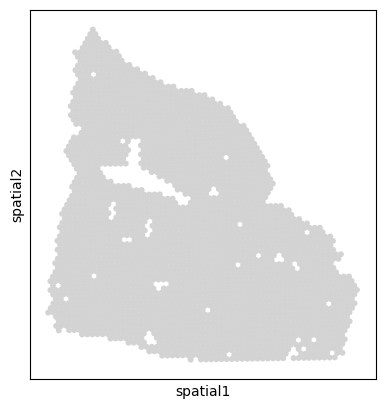

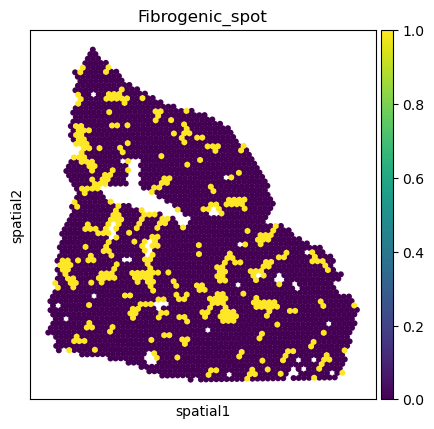

In [171]:
sc.pl.spatial(datasets['72h_m1'], spot_size = 100)
sc.pl.spatial(datasets['72h_m1'], spot_size = 100, color="Fibrogenic_spot")

In [172]:
datasets['72h_m1']

AnnData object with n_obs × n_vars = 2734 × 32285
    obs: 'Spot_barcode', 'Mouse', 'Time_point', 'Fibrogenic_spot', 'visium_coor_x', 'visium_coor_y', 'sample', 'timepoint'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'

In [175]:
import liana as li
import scanpy as sc
import pandas as pd

# ad = datasets['72h_m1']
ad = datasets['24h_m1']
# ad = datasets['48h_m5']

# sc.pp.normalize_total(ad)
# sc.pp.log1p(ad)
# ad.raw = ad
li.ut.spatial_neighbors(ad, bandwidth=200, cutoff=0.1, kernel='gaussian', set_diag=True)

In [177]:
lrdata = li.mt.bivariate(ad,
            resource_name='consensus', # NOTE: uses HUMAN gene symbols!
            local_name='cosine', # Name of the function
            global_name="morans", # Name global function
            n_perms=100, # Number of permutations to calculate a p-value
            mask_negatives=False, # Whether to mask LowLow/NegativeNegative interactions
            add_categories=True, # Whether to add local categories to the results
            nz_prop=0.001, # Minimum expr. proportion for ligands/receptors and their subunits
            use_raw=False,
            verbose=True
            )

Using `.X`!
/Users/rssantanu/anaconda3/envs/torch_flow_matching/lib/python3.10/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
15350 features of mat are empty, they will be removed.
Make sure that normalized counts are passed!
Using resource `consensus`.
/Users/rssantanu/anaconda3/envs/torch_flow_matching/lib/python3.10/site-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
100%|██████████| 100/100 [00:00<00:00, 287.71it/s]


In [178]:
lrdata

AnnData object with n_obs × n_vars = 3075 × 2
    obs: 'Spot_barcode', 'Mouse', 'Time_point', 'Fibrogenic_spot', 'visium_coor_x', 'visium_coor_y', 'sample', 'timepoint'
    var: 'ligand', 'receptor', 'ligand_means', 'ligand_props', 'receptor_means', 'receptor_props', 'morans', 'morans_pvals', 'mean', 'std'
    obsm: 'spatial'
    layers: 'cats', 'pvals'
    obsp: 'spatial_connectivities'